# Ejemplo:

Vamos a suponer que queremos predecir cuál es la probabilidad que tiene un estudiante de aprobar un examen en función de las horas que ha estudiado. Vale mencionar que para la realización de este ejercicio, se estima que un estudiante que estudie al menos 1.75 horas aprobará el examen.

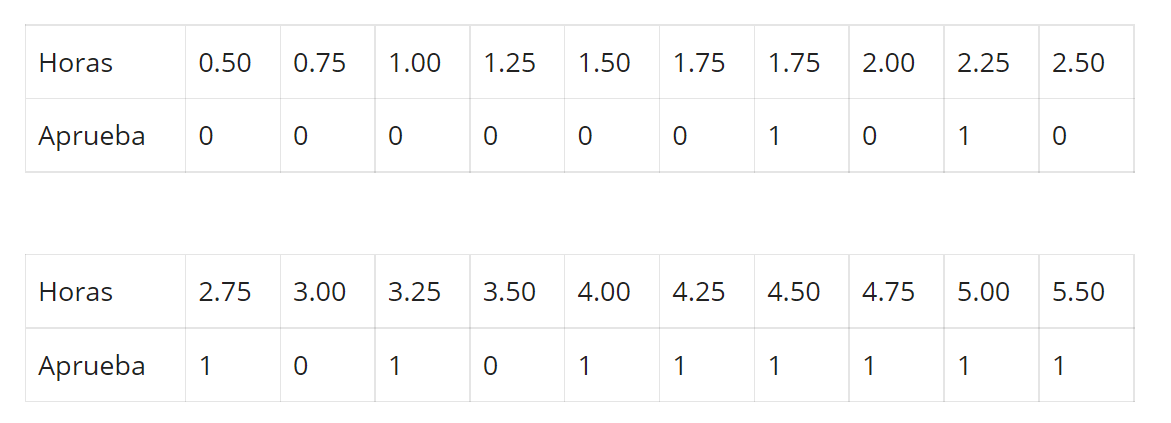Obtenemos la siguiente salida: 
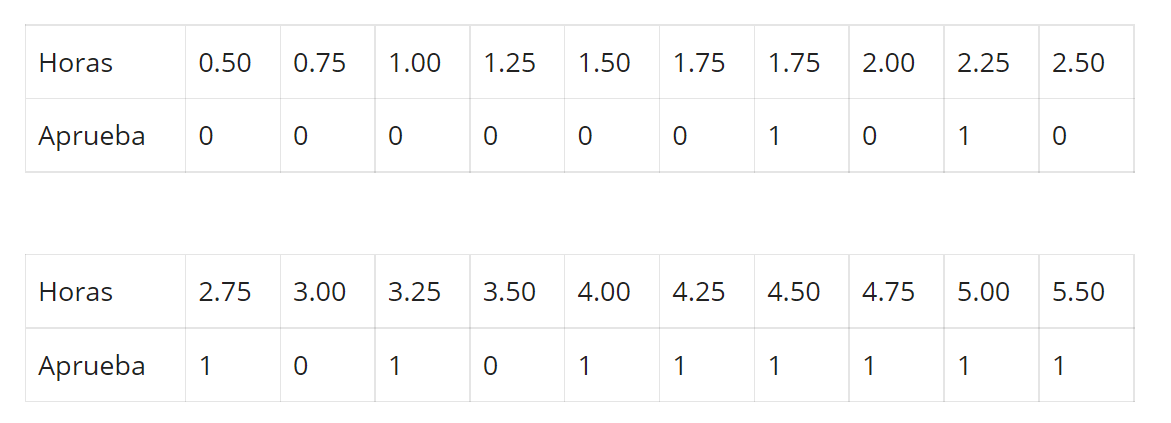

Podemos escribir el siguiente código python para representar los datos anteriores:

In [1]:
# Paso 1: importamos la librería numérica NumPy
import numpy as np

# Paso 2: preparamos los datos
X = np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5]).reshape(-1,1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

#Aclaración: X es las horas de estudio e y si aprueba o no el examen el alumno!

In [2]:
#Entrenamos un modelo de regresión logística

# Paso 3: importamos la clase LogisticRegresion de scikit-learn
from sklearn.linear_model import LogisticRegression

# Paso 4: Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

# Paso 5: Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X,y)

LogisticRegression()

In [3]:
#Hacemos la predicción para: 0.5, 1, 3 ó 6 horas de estudio...

X_nuevo = np.array([0.5, 1, 3, 6]).reshape(-1,1)

# Paso 6: Usa el modelo entrenado para obtener las predicciones con datos nuevos

prediccion = regresion_logistica.predict(X_nuevo)
print(prediccion)

#Insight: Como podemos observar si estudiamos 0.5 hs o 1 hs no aprobaríamos nuestro examen!

[0 0 1 1]


In [4]:
# Paso 7: Opcionalmente, obtenemos las probabilidades de la predicción
probabilidades_prediccion = regresion_logistica.predict_proba(X_nuevo)
print(probabilidades_prediccion)

[[0.92858952 0.07141048]
 [0.87984046 0.12015954]
 [0.42402118 0.57597882]
 [0.02293029 0.97706971]]


In [5]:
# Como seguramente estamos más interesados en la probabilidad de aprobar, podemos centrarnos en la segunda columna
print(probabilidades_prediccion[:,1])

[0.07141048 0.12015954 0.57597882 0.97706971]


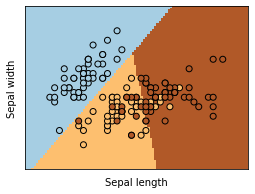

In [5]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()